In [36]:
import pandas as pd

In [37]:
customers_df=pd.read_csv("D:/sahyadri/8-sem/Customers.csv")
transactions_df=pd.read_csv("D:/sahyadri/8-sem/Transactions.csv")

In [38]:
customers_df.head(), transactions_df.head(), customers_df.info(), transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55         1   
 3        T00272      C0087      P067  2024-03-26 22:55:37         2   
 4        T00363      C0070      P067  2024-03-21 15:10:10         3   
 
    TotalValue   Price  
 0      300.68  300.68  
 1      300.68  300.68  
 2      300.68  300.68  
 3      601.36  300.68  
 4      902.04  300.68  ,
 None,
 None)

In [39]:
from datetime import datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [40]:
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')

In [41]:
customer_features=merged_df.groupby('CustomerID').agg({'TransactionID':'count','TotalValue':['sum','mean'],
                                                       'TransactionDate':lambda x:(datetime.now()-x.max()).days}).reset_index()

In [42]:
customer_features.columns=['CustomerID','TotalTransactions','TotalSpending','AvgSpending','Recency']

In [43]:
final_features=pd.merge(customer_features,customers_df[['CustomerID','Region']],on='CustomerID',how='left')

In [44]:
final_features=pd.get_dummies(final_features,columns=['Region'],drop_first=True)
final_features.head()

,CustomerID,TotalTransactions,TotalSpending,AvgSpending,Recency,Region_Europe,Region_North America,Region_South America
0,C0001,5,3354.52,670.904,84,False,False,True
1,C0002,4,1862.74,465.685,54,False,False,False
2,C0003,4,2725.38,681.345,154,False,False,True
3,C0004,8,5354.88,669.360,34,False,False,True
4,C0005,3,2034.24,678.080,83,False,False,False


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.metrics import davies_bouldin_score as DB
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(final_features.drop(columns=['CustomerID']))

In [47]:
cluster_results = {}
for n_clusters in range(2, 11):
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clustering.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, labels)
    cluster_results[n_clusters] = (labels, db_index)
cluster_results

{2: (array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
         0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
         1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
         0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
         0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
         0], dtype=int64),
  1.6148963753005146),
 3: (array([0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2,
         1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0, 1,
         2, 2, 2, 0, 2, 2, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1,
         2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0,

In [48]:
best_n_clusters = min(cluster_results, key=lambda x: cluster_results[x][1])
print(f"Best cluster: {best_n_clusters}")
best_labels,best_db_index=cluster_results[best_n_clusters]

Best cluster: 9


In [49]:
final_features['Cluster']=best_labels

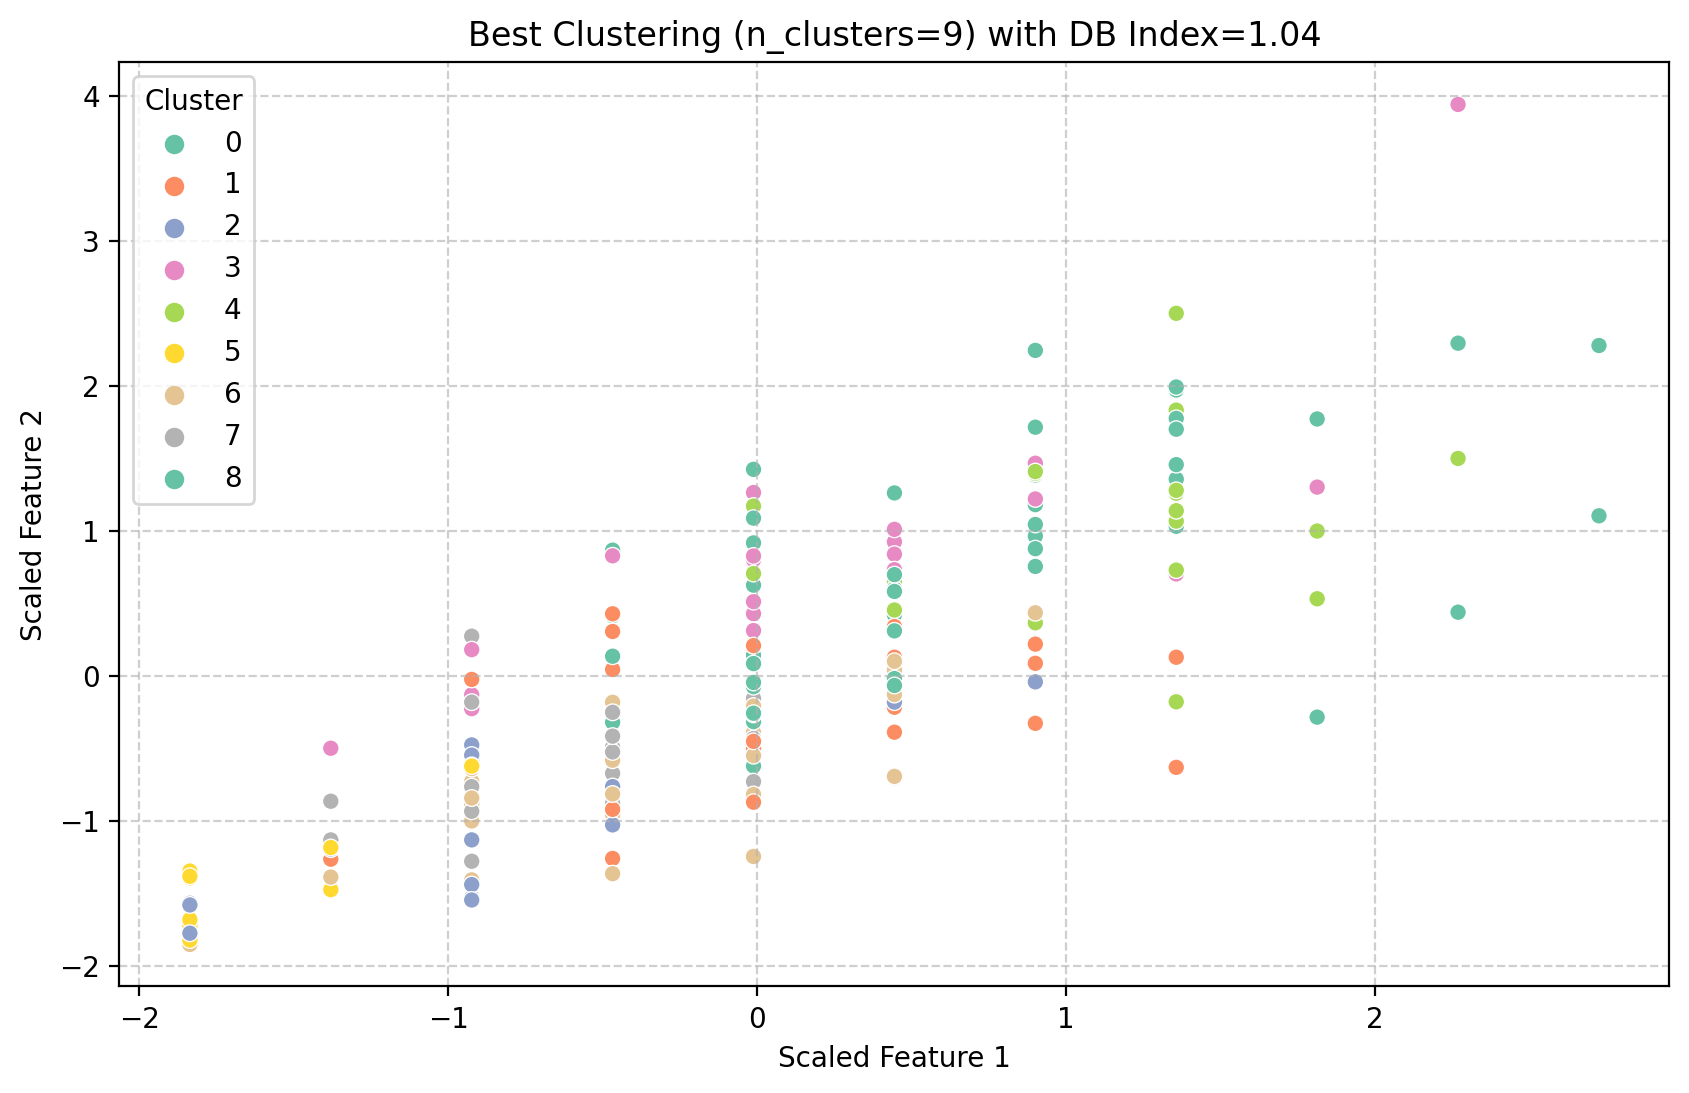

In [52]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=scaled_features[:, 0],y=scaled_features[:, 1],hue=best_labels,palette="Set2")
plt.title(f'Best Clustering (n_clusters={best_n_clusters}) with DB Index={best_db_index:.2f}')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.legend(title='Cluster',loc='best')
plt.grid(linestyle='--',alpha=0.6)
plt.show()

In [59]:
best_n_clusters,best_db_index

(9, 1.037970164550074)

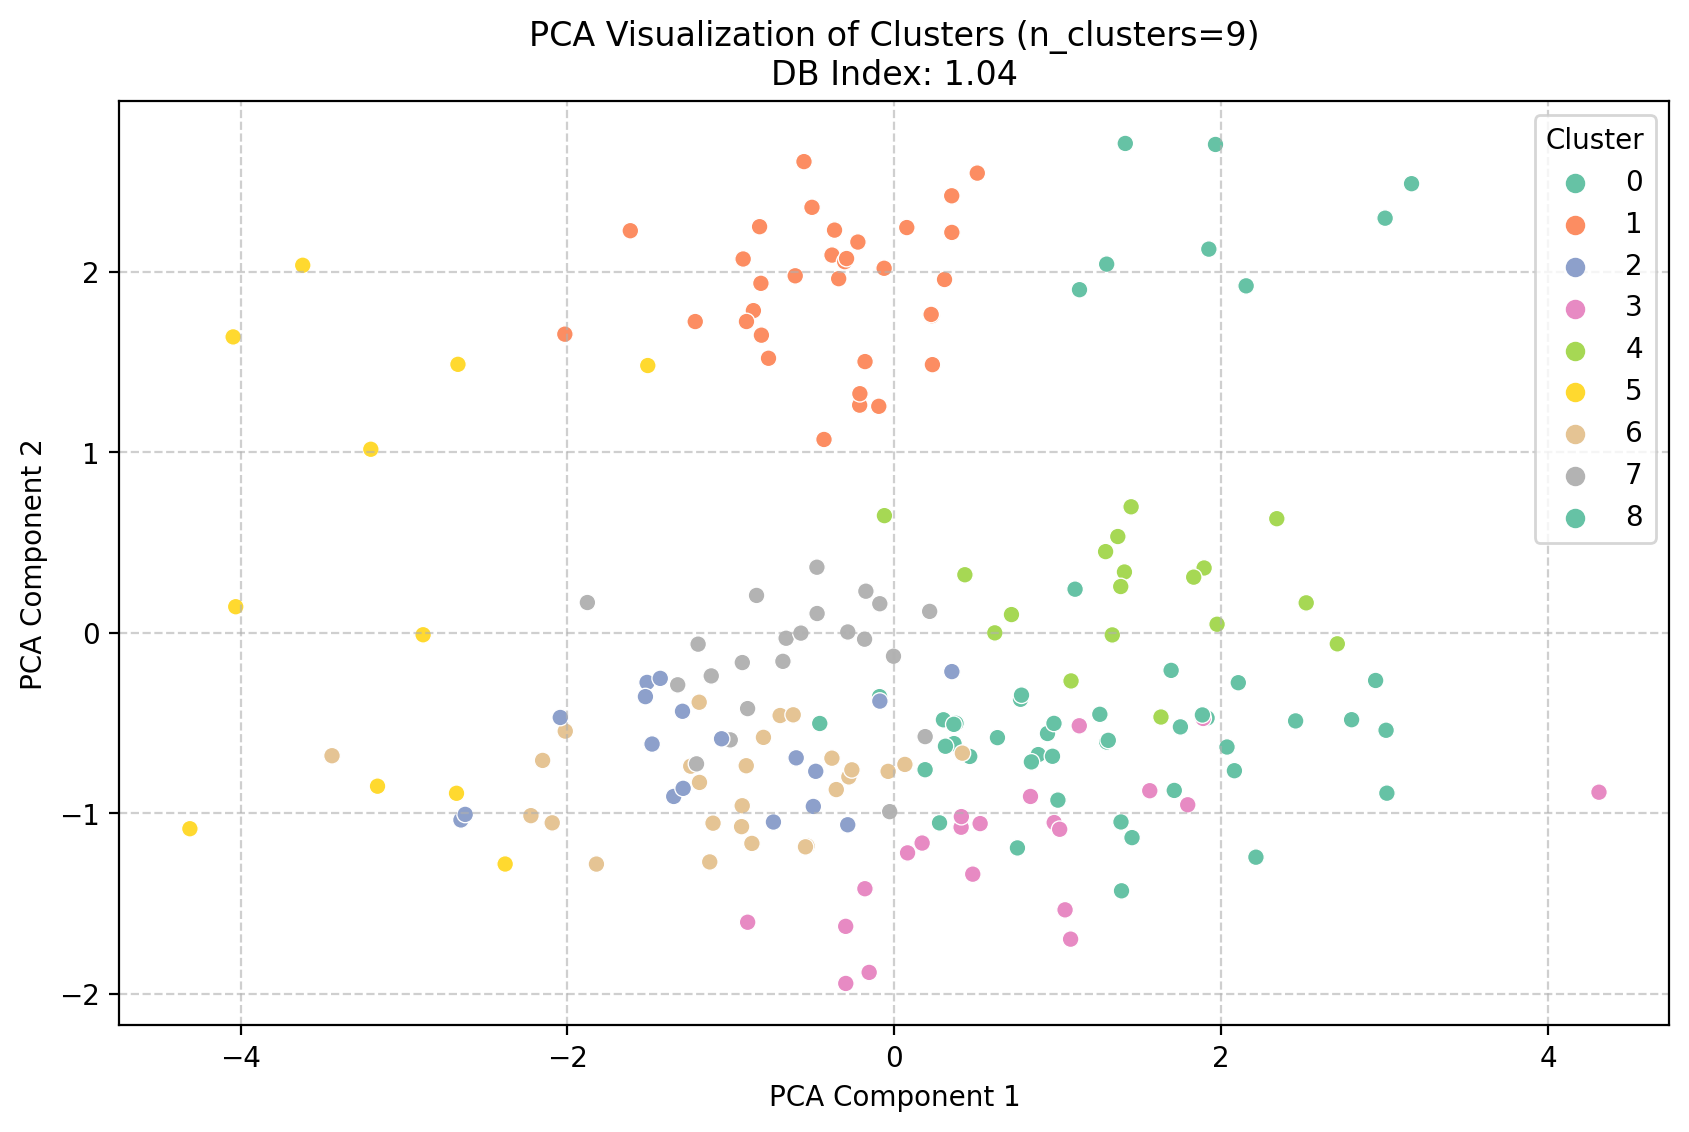

In [55]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_features=pca.fit_transform(scaled_features)
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=pca_features[:,0],y=pca_features[:,1],hue=best_labels,palette="Set2",legend="full")
plt.title(f'PCA Visualization of Clusters (n_clusters={best_n_clusters})\nDB Index: {best_db_index:.2f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.legend(title='Cluster')
plt.grid(linestyle='--',alpha=0.6)
plt.show()

In [57]:
pairplot_data=pd.DataFrame(scaled_features,columns=final_features.columns[1:-1])
pairplot_data['Cluster']=best_labels

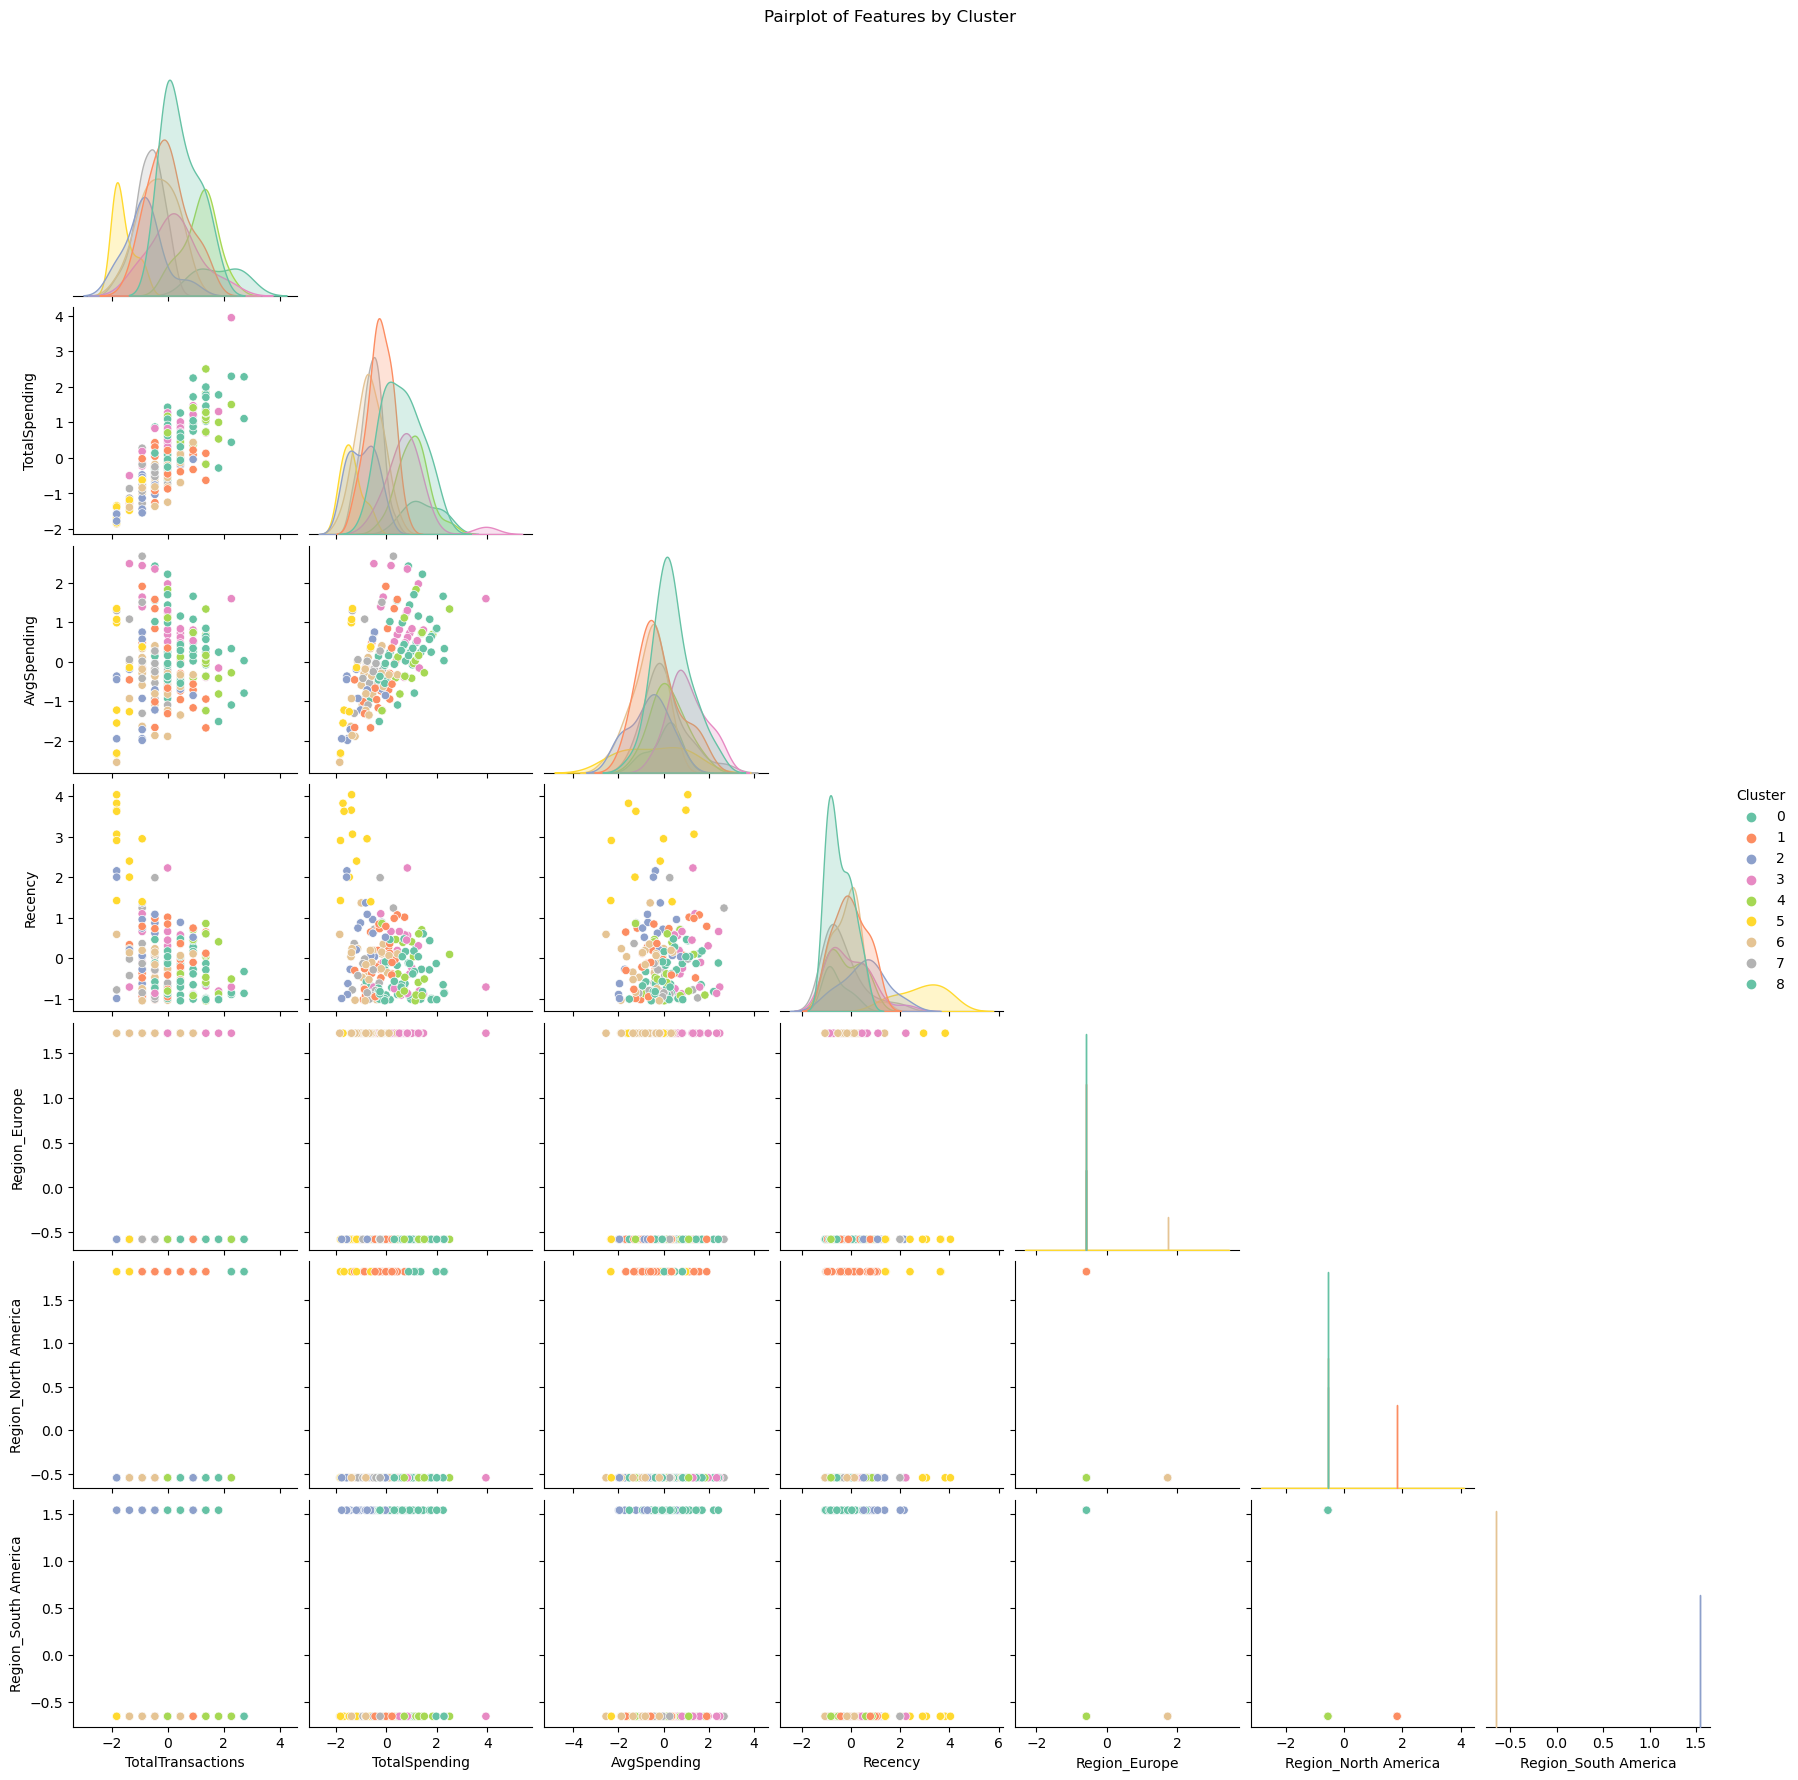

In [66]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(pairplot_data,hue="Cluster",palette="Set2",corner=True)
plt.suptitle("Pairplot of Features by Cluster",y=1.02)
plt.show()

In [63]:
cluster_profiles = final_features.groupby('Cluster').agg({'TotalTransactions':['mean','median'],'TotalSpending': ['mean','median'],'AvgSpending':['mean','median'],'Recency':['mean','median']}).reset_index()

In [64]:
print("Cluster Profile:")
cluster_profiles

Cluster Profile:


Cluster TotalTransactions        TotalSpending           AvgSpending  \
                       mean median          mean    median        mean   
0       0          6.000000    6.0   4593.523659  4565.570  774.580345   
1       1          4.969697    5.0   2983.179394  2973.960  636.792952   
2       2          3.222222    3.0   1723.227222  1774.660  532.310648   
3       3          5.523810    5.0   4950.590000  4931.740  938.321492   
4       4          7.500000    8.0   5379.353889  5485.455  736.287599   
5       5          1.545455    1.0    938.832727   922.410  578.210758   
6       6          4.222222    4.0   2219.001481  2185.820  522.400080   
7       7          3.545455    4.0   2381.183182  2536.375  704.947879   
8       8          9.000000    9.0   6097.636250  5789.125  692.875129   

                  Recency         
       median        mean median  
0  747.322857   71.170732   59.0  
1  585.386000  101.242424   96.0  
2  551.641667  140.444444  150.5  
3  880.956000   99.190476   86.0  
4  718.953542   87.611111   73.0  
5  652.340000  304.545455  312.0  
6  550.936000   90.925926   96.0  
7  659.953750   80.227273   57.0  
8  734.226250   61.625000   42.5